<a href="https://colab.research.google.com/github/DilshanBotheju/BankMarketingPredictionSystem/blob/main/ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import numpy as np
import pandas as pd

In [250]:
# Load the data set with seperated columns
data_path = "/content/drive/MyDrive/CM2604_CW/bank-additional-full.csv"
bank_data = pd.read_csv(data_path, encoding = "latin-1", sep =";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [251]:
# To get no. of columns and rows
bank_data.shape

(41188, 21)

In [252]:
# Duplicate handling
duplicates = bank_data.duplicated().sum()
duplicates



12

In [253]:
# Remove duplicate
bank_data = bank_data.drop_duplicates()

In [254]:
# Rows after removing duplicates
bank_data.shape

(41176, 21)

In [255]:
# Replace places with unknown to null in whole dataset
bank_data = bank_data.replace("unknown",pd.NA)

In [256]:
# To calculate no. of null fields in each column
bank_data.isnull().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [257]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [258]:
# Getting category counts for y column
bank_data["y"].value_counts()

,count
y,
no,36537
yes,4639


In [259]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for "y" column
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

In [260]:
# Convert columns to numerical columns
numeric_bank_data = bank_data.select_dtypes(include= "number")

In [261]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [262]:
# To identify correlation among y column and other numeric columns
correlation = numeric_bank_data.corr()["y"]
correlation

,y
age,0.030381
duration,0.405297
campaign,-0.066361
pdays,-0.324948
previous,0.230202
emp.var.rate,-0.298289
cons.price.idx,-0.136134
cons.conf.idx,0.054802
euribor3m,-0.307740
nr.employed,-0.354669


Job column

In [263]:
# To handle null values when encoding
def setJob(job):
    if pd.isna(job):
        return "Null"
    else:
        return job

bank_data["job"] = bank_data["job"].apply(setJob)

In [264]:
bank_data["job"].value_counts()

,count
job,
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


Marital column

In [265]:
# Handle null values when enoding

def setMarital(marital):
    if pd.isna(marital):
        return "Null"
    else:
        return marital

bank_data["marital"] = bank_data["marital"].apply(setMarital)

In [266]:
bank_data["marital"].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
Null,80


education column

In [267]:
# Making the available categories simple
def setEducation(education):
    if pd.isna(education):
        return "Null"
    elif education in ["basic.9y", "basic.6y", "basic.4y"]:
        return "basic"
    else:
        return education

# Applying the function
bank_data["education"] = bank_data["education"].apply(setEducation)

In [268]:
bank_data["education"].value_counts()

,count
education,
basic,12512
university.degree,12164
high.school,9512
professional.course,5240
Null,1730
illiterate,18


In [269]:
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


default amount column

In [270]:
# Handle null values in default column
def setDefault(default):
    if pd.isna(default):
        return "Null"
    else:
        return default

# Apply function to column
bank_data["default"] = bank_data["default"].apply(setDefault)

In [271]:
bank_data["default"].value_counts()

,count
default,
no,32577
Null,8596
yes,3


housing loan column

In [272]:
# Handle null values
def setHousing(housing):
    if pd.isna(housing):
        return "Null"
    else:
        return housing

bank_data["housing"] = bank_data["housing"].apply(setHousing)

In [273]:
bank_data["housing"].value_counts()

,count
housing,
yes,21571
no,18615
Null,990


personal loan column

In [274]:
# Handle null values
def setPersonal(personal):
    if pd.isna(personal):
        return "Null"
    else:
        return personal

bank_data["loan"] = bank_data["loan"].apply(setPersonal)

In [275]:
bank_data["loan"].value_counts()

,count
loan,
no,33938
yes,6248
Null,990


pdays column

In [276]:
# Convert 999 days to -1
bank_data["pdays"] = bank_data["pdays"].replace(999,-1)

In [277]:
bank_data["pdays"].value_counts()

,count
pdays,
-1,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [278]:
# To see the data types
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [279]:
# Getting categorical columns
categorical_bank_data = bank_data.select_dtypes(include="object")

In [280]:
# Label encoding categorical colums
for column in categorical_bank_data.columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

In [281]:
# Display encoded dataset
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,2,0,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,2,1,2,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,2,1,1,2,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [282]:
#from sklearn.preprocessing import StandardScaler

# Assuming numeric_bank_data is a subset of bank_data
#numeric_columns = bank_data.select_dtypes(include=["float64", "int64"]).columns
#print(numeric_columns)

# Remove y column
#numeric_columns = numeric_columns.drop("y")

# Standardize the numeric columns
#ss = StandardScaler()
#bank_data[numeric_columns] = ss.fit_transform(bank_data[numeric_columns])

In [283]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,2,0,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,2,1,2,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,1,1,1,1,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,2,1,1,2,1,6,1,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [284]:
correlation = bank_data.corr()["y"]
correlation

,y
age,0.030381
job,0.025547
marital,0.044585
education,0.048877
default,0.099210
housing,0.011436
loan,-0.003151
contact,-0.144774
month,-0.006051
day_of_week,0.015970


In [285]:
# Drop specified columns, ignoring errors for missing columns
bank_data = bank_data.drop(["loan","contact","month","duration","campaign","emp.var.rate","cons.price.idx","euribor3m","nr.employed"], axis=1, errors='ignore')

In [286]:
correlation = bank_data.corr()["y"]
correlation

,y
age,0.030381
job,0.025547
marital,0.044585
education,0.048877
default,0.099210
housing,0.011436
day_of_week,0.015970
pdays,0.279053
previous,0.230202
poutcome,0.129810


In [287]:
# View finalized dataset
bank_data.head()

,age,job,marital,education,default,housing,day_of_week,pdays,previous,poutcome,cons.conf.idx,y
0,56,4,2,1,1,1,1,-1,0,1,-36.4,0
1,57,8,2,2,0,1,1,-1,0,1,-36.4,0
2,37,8,2,2,1,2,1,-1,0,1,-36.4,0
3,40,1,2,1,1,1,1,-1,0,1,-36.4,0
4,56,8,2,2,1,1,1,-1,0,1,-36.4,0


In [288]:
# Seperating traget variable and features
X = bank_data.drop("y", axis = 1).values
y = bank_data["y"].values

In [289]:
from sklearn.model_selection import train_test_split

# Seperating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [290]:
# To see the training and testing data
X_train.shape, X_test.shape

((28823, 11), (12353, 11))

In [291]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert column to int
y_train = y_train.astype("int")

# Balancing dataset using SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("Original training class distribution:", Counter(y_train))
print("Resampled training class distribution:", Counter(y_train_balanced))

Original training class distribution: Counter({0: 25546, 1: 3277})
Resampled training class distribution: Counter({0: 25546, 1: 25546})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [292]:
X_train_balanced.shape

(51092, 11)

Random Forest Classifier

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Classifier:
Accuracy: 0.8890957662106371
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10991
           1       0.50      0.29      0.37      1362

    accuracy                           0.89     12353
   macro avg       0.71      0.63      0.65     12353
weighted avg       0.87      0.89      0.88     12353



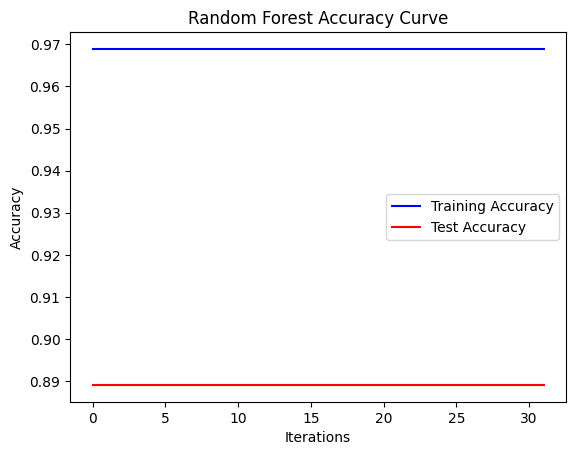

In [293]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Parameter grid for tuning
rf_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}

# GridSearchCV to tune the model
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

# Fit the model
rf_grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best model
best_rf_model = rf_grid_search.best_estimator_
print("Best Parameters:", rf_grid_search.best_params_)

# Get the training and test accuracy during the evaluation
train_accuracy = []
test_accuracy = []

# Predict on the training set and the test set
for i in range(1, len(rf_grid_search.cv_results_['mean_fit_time']) + 1):
    best_rf_model.fit(X_train_balanced, y_train_balanced)
    train_accuracy.append(accuracy_score(y_train_balanced, best_rf_model.predict(X_train_balanced)))
    test_accuracy.append(accuracy_score(y_test, best_rf_model.predict(X_test)))

# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_test)
print("\nTuned Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Plotting the accuracy curve
plt.plot(train_accuracy, label='Training Accuracy', color="blue")
plt.plot(test_accuracy, label='Test Accuracy', color ="red")
plt.title('Random Forest Accuracy Curve')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Neural Network

Epoch 1/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6166 - loss: 0.6385 - val_accuracy: 0.7516 - val_loss: 0.5825
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6465 - loss: 0.6140 - val_accuracy: 0.7669 - val_loss: 0.6035
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6525 - loss: 0.6085 - val_accuracy: 0.8408 - val_loss: 0.5188
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6563 - loss: 0.6048 - val_accuracy: 0.8032 - val_loss: 0.5801
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6626 - loss: 0.5972 - val_accuracy: 0.6793 - val_loss: 0.6433
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6631 - loss: 0.5944 - val_accuracy: 0.8000 - val_loss: 0.5443
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6692 - loss: 0.5909 - val_accuracy: 0.6496 - val_loss: 0.6401
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6688 - loss: 0.5875 - 

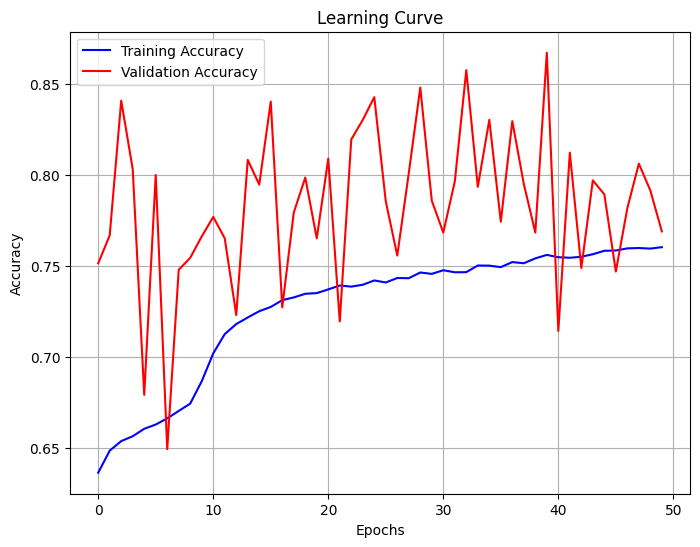

In [294]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Using Sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train_balanced.shape[1],)))

# Hidden Layer 1 with ReLU activation
model.add(Dense(50, activation='relu'))

# Hidden Layer 2 with Sigmoid activation
model.add(Dense(50, activation='sigmoid'))

# Output Layer with Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("\nNeural Network Classifier with Multiple Activation Functions:")
print(f"Test Accuracy: {accuracy:.2f}")

# Plot the curve
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
